Text(0, 0.5, 'Error')

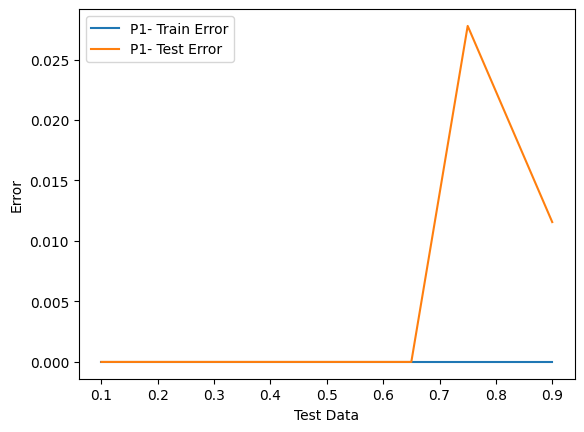

In [58]:
import numpy as np
import time
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier

#Data
strdata=np.loadtxt('energy.csv', delimiter=',', dtype=str)
strdata=strdata[1:,:]
data=strdata.astype('double')
input=data[:,0:-2]
output1=data[:,-2:-1]
output1[output1<=22.3] = -1 #small heating load
output1[output1> 22.3] = 1 #large heating load

output2=data[:,-1:-1]
output2[output2<=24.6] = -1 #small cooling load
output2[output2> 24.6] = 1 #large cooling load

#Split into test and train data
vals=[0.1, 0.25, 0.35, 0.50, 0.65, 0.75, 0.9]
#vals=[0.10]
errortrain1=[]
errortest1=[]
times1=[]
iters1=[]
#vals=[0.99]
for val in vals:
    X_train, X_test, y_train, y_test = train_test_split (input, output1, test_size=val)
    num=X_train.shape[0] #number of rows
    start=time.time()
    ada= AdaBoostClassifier(random_state=212)
    ada.fit(X_train, y_train.ravel())
    end=time.time()
    ttime=end-start
    times1.append(ttime)
    predictrain1=ada.predict(X_train)
    predictest1=ada.predict(X_test)
    #errortrain
    error=predictrain1-y_train.ravel()
    error=abs(error/2)
    error=sum(error)/y_train.size
    errortrain1.append(error)
    #errortest
    error=predictest1-y_test.ravel()
    error=abs(error/2)
    error=sum(error)/y_test.size
    errortest1.append(error)
    iter=len(ada.estimators_)
    iters1.append(iter)
import matplotlib.pyplot as plt
plt.plot(vals,errortrain1, vals, errortest1)
plt.legend(["P1- Train Error", "P1- Test Error"])
plt.xlabel("Test Data")
plt.ylabel("Error")


Text(0, 0.5, 'Error')

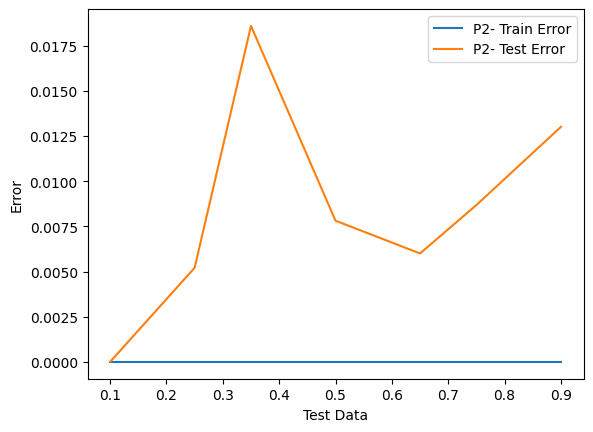

In [59]:
import numpy as np
import time
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier

#Data
strdata=np.loadtxt('energy.csv', delimiter=',', dtype=str)
strdata=strdata[1:,:]
data=strdata.astype('double')
input=data[:,0:-2]
output1=data[:,-2:-1]
output1[output1<=22.3] = -1 #small heating load
output1[output1> 22.3] = 1 #large heating load

output2=data[:,-1:]
output2[output2<=24.6] = -1 #small cooling load
output2[output2> 24.6] = 1 #large cooling load

#Split into test and train data
vals=[0.1, 0.25, 0.35, 0.50, 0.65, 0.75, 0.9]
#vals=[0.10]
errortrain2=[]
errortest2=[]
times2=[]
iters2=[]
for val in vals:
    X_train, X_test, y_train, y_test = train_test_split (input, output2, test_size=val)
    num=X_train.shape[0] #number of rows
    start=time.time()
    ada= AdaBoostClassifier(random_state=212)
    ada.fit(X_train, y_train.ravel())
    end=time.time()
    ttime=end-start
    times2.append(ttime)
    predictrain2=ada.predict(X_train)
    predictest2=ada.predict(X_test)
    #errortrain
    error=predictrain2-y_train.ravel()
    error=abs(error/2)
    error=sum(error)/y_train.size
    errortrain2.append(error)
    #errortest
    error=predictest2-y_test.ravel()
    error=abs(error/2)
    error=sum(error)/y_test.size
    errortest2.append(error)

plt.plot(vals,errortrain2, vals, errortest2)
plt.legend(["P2- Train Error", "P2- Test Error"])
plt.xlabel("Test Data")
plt.ylabel("Error")

Text(0, 0.5, 'Time')

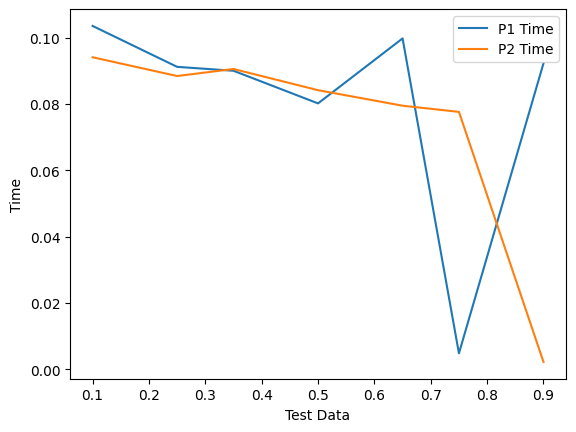

In [60]:
plt.plot(vals,times1, vals, times2)
plt.legend(["P1 Time", "P2 Time"])
plt.xlabel("Test Data")
plt.ylabel("Time")